In [16]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import re
sb.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [10]:
OlyData = pd.read_csv("athlete_events.csv")
OlyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [11]:
OlyData_Summer = OlyData[OlyData["Season"]=="Summer"]

In [12]:
OlyData_Summer.info

<bound method DataFrame.info of             ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26           8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
27           8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
29          10       Einar Ferdinand "Einari" Aalto   M  26.0     NaN     NaN   
31          12                    Jyri Tapani Aalto   M  31.0   172.0    70.0   
32          13                   Minna Maarit Aalto   F  30.0   159.0    55.5   
33          13                   Minna Maarit Aalto   F  34.0   159.0    55.5   
35          15                 Arvo Ossian Aaltonen   M  22.0     NaN     NaN

In [13]:
OlyData_Summer = OlyData_Summer.drop(["Games","NOC","ID","City"], axis = 1)
OlyData_Summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 0 to 271110
Data columns (total 12 columns):
Name      222552 non-null object
Sex       222552 non-null object
Age       213363 non-null float64
Height    170695 non-null float64
Weight    168698 non-null float64
Team      222552 non-null object
Year      222552 non-null int64
Season    222552 non-null object
City      222552 non-null object
Sport     222552 non-null object
Event     222552 non-null object
Medal     34088 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 22.1+ MB


In [15]:
OlyData_Summer.describe()

,Age,Height,Weight,Year
count,213363.000000,170695.000000,168698.00000,222552.000000
mean,25.674053,175.515551,70.68906,1976.317094
std,6.699839,10.914725,14.80394,30.942802
min,10.000000,127.000000,25.00000,1896.000000
25%,21.000000,168.000000,60.00000,1956.000000
50%,24.000000,175.000000,70.00000,1984.000000
75%,28.000000,183.000000,79.00000,2000.000000
max,97.000000,226.000000,214.00000,2016.000000


In [17]:
OlyData_Summer["Team"] = OlyData_Summer["Team"].apply(lambda x: re.sub(r'(.+)(Forme)',r'\1', x))
OlyData_Summer["Team"] = OlyData_Summer["Team"].apply(lambda x: re.sub(r'(.+)(Cloak)',r'\1', x))
OlyData_Summer["Team"] = OlyData_Summer["Team"].apply(lambda x: re.sub(r'(.+)(Rotom)',r'\1', x))
OlyData_Summer["Team"] = OlyData_Summer["Team"].apply(lambda x: re.sub(r'(.+)(Size)',r'\1', x))
OlyData_Summer["Team"] = OlyData_Summer["Team"].apply(lambda x: re.sub(r'(Hoopa)(.+)',r'\2', x))

In [18]:
OlyData_Summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 0 to 271110
Data columns (total 12 columns):
Name      222552 non-null object
Sex       222552 non-null object
Age       213363 non-null float64
Height    170695 non-null float64
Weight    168698 non-null float64
Team      222552 non-null object
Year      222552 non-null int64
Season    222552 non-null object
City      222552 non-null object
Sport     222552 non-null object
Event     222552 non-null object
Medal     34088 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 22.1+ MB


In [19]:
OlyData_Summer["Sex"] = OlyData_Summer["Sex"].astype("category")
OlyData_Summer["Team"] = OlyData_Summer["Team"].astype("category")
OlyData_Summer["Year"] = OlyData_Summer["Year"].astype("category")
OlyData_Summer["Sport"] = OlyData_Summer["Sport"].astype("category")
OlyData_Summer["Event"] = OlyData_Summer["Event"].astype("category")
OlyData_Summer["Medal"] = OlyData_Summer["Medal"].astype("category")

In [20]:
OlyData_Summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 0 to 271110
Data columns (total 12 columns):
Name      222552 non-null object
Sex       222552 non-null category
Age       213363 non-null float64
Height    170695 non-null float64
Weight    168698 non-null float64
Team      222552 non-null category
Year      222552 non-null category
Season    222552 non-null object
City      222552 non-null object
Sport     222552 non-null category
Event     222552 non-null category
Medal     34088 non-null category
dtypes: category(6), float64(3), object(3)
memory usage: 13.7+ MB


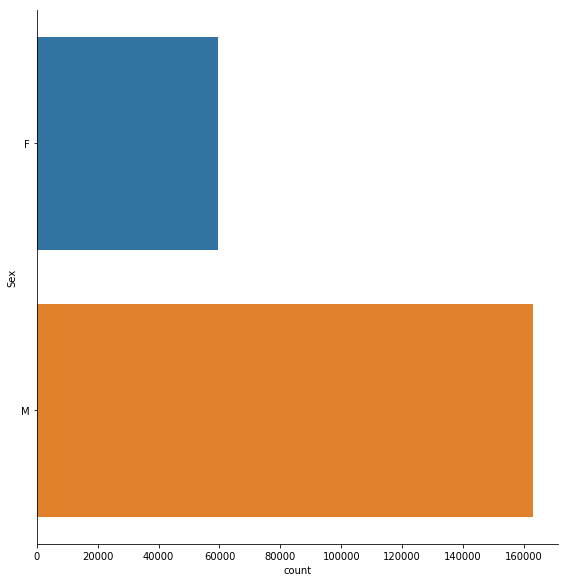

In [23]:
cat = pd.DataFrame(OlyData_Summer[["Age", "Height", "Weight", "Sex"]])
sb.catplot(y = 'Sex', data = cat, kind = "count", height = 8)

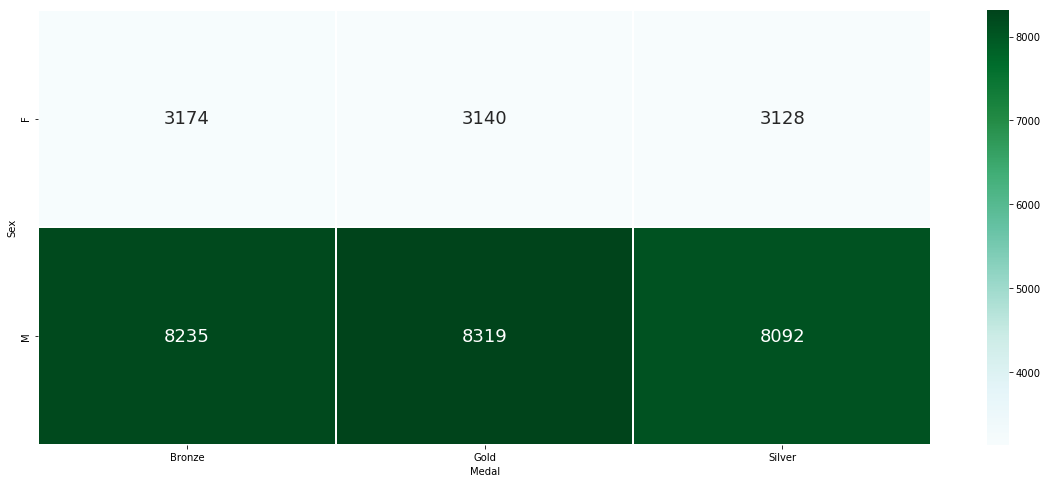

In [24]:
f, axes = plt.subplots(1, 1, figsize=(20, 8))
sb.heatmap(OlyData_Summer.groupby(['Sex', 'Medal']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

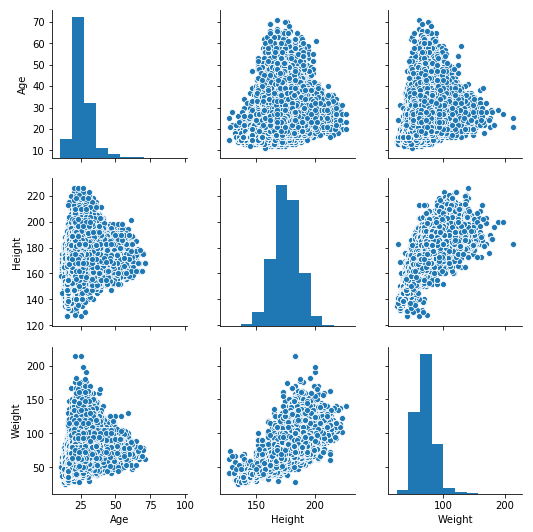

In [27]:
numData = pd.DataFrame(OlyData_Summer[["Age", "Height", "Weight"]])
sb.pairplot(data = numData)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

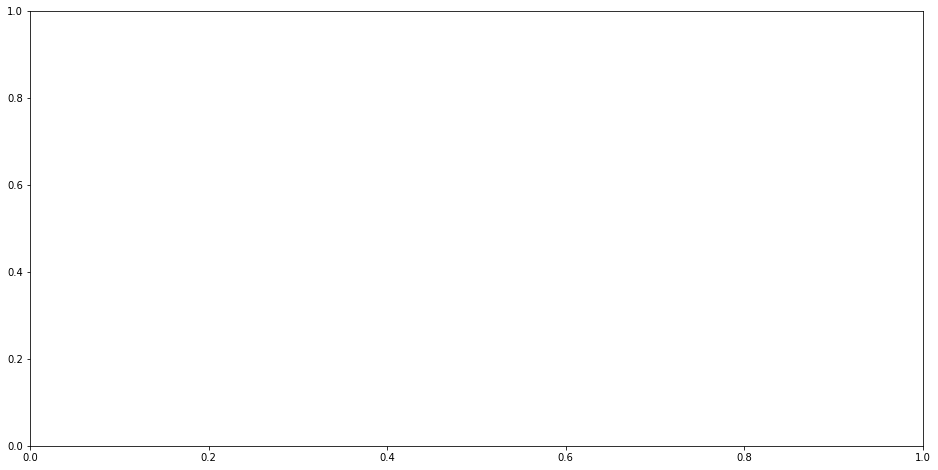

In [28]:
cat = pd.DataFrame(OlyData_Summer[["Sex", "Team", "Year", "Sport", "Event", "Medal"]])
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'Sex', y = 'Medal', data = cat)